## CNN on MNIST dataset with keras

**Data Set**: MNIST

### Dataset Source

Source - http://yann.lecun.com/exdb/mnist/


### Source:

#### Donor:

Yann LeCun, Courant Institute, NYU

Corinna Cortes, Google Labs, New York

Christopher J.C. Burges, Microsoft Research, Redmond

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [1]:
# Fix random seed for reproducibility

import numpy as np

np.random.seed(123) 

In [2]:
from keras.models import Sequential

In [3]:
from keras.layers import core

In [4]:
from keras.layers import convolutional, pooling

In [5]:
#     import some utilities. This will help us transform our data later:

from keras.utils import np_utils

In [6]:
from keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
import matplotlib.pyplot as plt

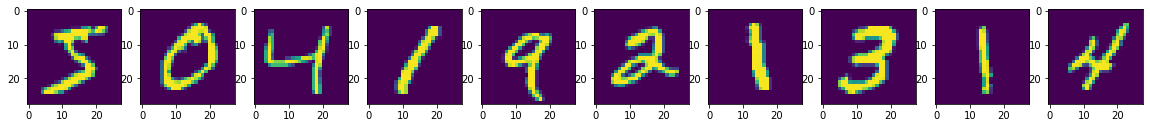

In [10]:
n = 10

plt.figure(figsize= (20,4))

for i in range (n):
    ax = plt.subplot(2, n , i+1)
    
    plt.imshow(x_train[i].reshape(28,28))


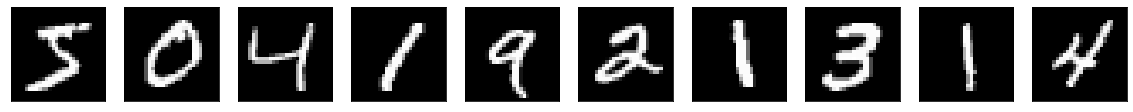

In [11]:
n = 10

plt.figure(figsize= (20,4))

for i in range (n):
    ax = plt.subplot(2, n , i+1)
    
    plt.imshow(x_train[i].reshape(28,28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
y_test.shape

(10000,)

In [16]:
x_train[0:1,:].shape

(1, 28, 28)

In [17]:
ar1 = np.array([[1,0,-1], [2, 0, -2], [1, 0, -1]])

In [18]:
ar1

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

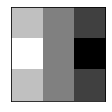

In [19]:
plt.figure(figsize=(20, 4))

    # display the image
ax = plt.subplot(2, n, i + 1)
plt.imshow(ar1)
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [20]:
ar2 = np.array([[1,0,1], [1,0,1], [1,0,1]])

In [21]:
ar2

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]])

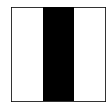

In [22]:
plt.figure(figsize=(20, 4))

    # display the image
ax = plt.subplot(2, n, i + 1)
plt.imshow(ar2)
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [23]:
ar3 = np.array([[1,1,1],
               [-1,-1,-1],
               [1,1,1]])

In [24]:
ar3

array([[ 1,  1,  1],
       [-1, -1, -1],
       [ 1,  1,  1]])

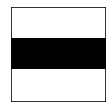

In [25]:
plt.figure(figsize=(20, 4))

    # display the image
ax = plt.subplot(2, n, i + 1)
plt.imshow(ar3)
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [26]:
from keras import backend

In [27]:
print(backend.backend())

tensorflow


In [28]:
print(backend.image_data_format())

channels_last


In [29]:
x_train.shape[0]

60000

In [30]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_train.shape[2], 1)

In [31]:
x_train.shape

(60000, 28, 28, 1)

In [32]:
x_test.shape

(10000, 28, 28, 1)

In [33]:
x_train.dtype

dtype('uint8')

In [34]:
x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

In [35]:
x_train /= 255

x_test /= 255

In [36]:
y_train[:10] # first 10 rows, 

# We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array.

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [37]:
#### Convert 1-dimensional class arrays to 10-dimensional class matrices

In [38]:
y_train_cv = np_utils.to_categorical(y_train, 10)

y_test_cv = np_utils.to_categorical(y_test, 10)

In [39]:
y_train_cv.shape

(60000, 10)

In [40]:
y_test_cv.shape

(10000, 10)

In [41]:
y_train_cv[:3, :]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#### Define model architecture.

Declaring a sequential model

In [42]:
model = Sequential()

In [43]:
model.add(convolutional.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28,28,1) ))

#### 2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis), e.g. input_shape=(28, 28, 1) for 28x28 gray pictures in data_format="channels_last".

First parameters correspond to the number of convolution filters 

Next 2 parameters correspond to kernal size

In [44]:
model.add(convolutional.Conv2D(32, (3,3), activation = 'relu'))

In [45]:
model.add(pooling.MaxPooling2D(pool_size =(2,2))) 

In [46]:
model.add(core.Dropout(0.25))

Dropout

    This is a method for regularizing our model in order to prevent overfitting. 

MaxPooling2D 

    Is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

So far, for model parameters, we've added two Convolution layers. To complete our model architecture, let's add a fully connected layer and then the output layer

In [47]:
model.add(core.Flatten())

In [48]:
model.add(core.Dense(128, activation = 'relu'))

In [49]:
model.add(core.Dropout(0.5))

In [50]:
model.add(core.Dense(10, activation = 'softmax'))

For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

#### Compile model

Compile the model by providing the loss function and the optimizer 

In [51]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

#### Fit model on training data.

In [53]:
model.fit(x_train, y_train_cv, batch_size = 32, epochs = 2, verbose = 2)

Epoch 1/2
1875/1875 - 113s - loss: 0.2054 - accuracy: 0.9371
Epoch 2/2
1875/1875 - 113s - loss: 0.0858 - accuracy: 0.9745


#### Evaluate the model on test data.

In [54]:
score = model.evaluate(x_test, y_test_cv)

313/313 [==============================] - 4s 14ms/step - loss: 0.0398 - accuracy: 0.9860


In [55]:
score

[0.03983873501420021, 0.9860000014305115]

#### Make predictions on test data 

In [56]:
predictions = model.predict(x_test)

In [57]:
predictions

array([[4.27968355e-10, 1.64023731e-07, 4.49757280e-08, ...,
        9.99998093e-01, 1.26567601e-09, 1.59234821e-06],
       [1.33437638e-07, 2.85224014e-05, 9.99969602e-01, ...,
        1.32491976e-10, 3.70383937e-08, 1.28235335e-12],
       [2.66321409e-10, 9.99997020e-01, 8.25689241e-08, ...,
        1.64127846e-06, 1.71329173e-08, 2.64234412e-09],
       ...,
       [1.53426507e-13, 4.16518331e-09, 4.76343661e-12, ...,
        2.74148482e-09, 7.66605979e-09, 2.54932183e-06],
       [1.10604175e-08, 1.46863037e-08, 3.10851817e-10, ...,
        1.55948321e-08, 7.20111275e-05, 9.86976332e-08],
       [1.32887646e-06, 5.58618873e-10, 5.84644511e-09, ...,
        5.60102908e-10, 1.98339905e-08, 1.64203748e-10]], dtype=float32)

In [58]:
y_pred_class = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [59]:
y_pred_class

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [60]:
# calculate accuracy of class predictions

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.986

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 975,    0,    1,    0,    0,    0,    3,    1,    0,    0],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   7,    7, 1005,    2,    5,    0,    0,    6,    0,    0],
       [   0,    0,    3,  999,    0,    2,    0,    2,    2,    2],
       [   0,    0,    0,    0,  974,    0,    1,    0,    0,    7],
       [   1,    0,    1,    4,    0,  883,    2,    0,    1,    0],
       [   5,    2,    0,    0,    4,    4,  942,    0,    1,    0],
       [   1,    4,    5,    2,    0,    1,    0, 1010,    1,    4],
       [  10,    1,    1,    1,    3,    0,    1,    1,  949,    7],
       [   2,    2,    0,    0,    8,    3,    0,    4,    1,  989]],
      dtype=int64)

Reference: 

    https://keras.io/
    https://elitedatascience.com
    http://scikit-learn.org/stable/modules/classes.html

http://scs.ryerson.ca/~aharley/vis/conv/flat.html